In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from scipy import stats
%load_ext autoreload
%autoreload 2
from implementations import *
from cross_validation import *

In [2]:
from helpers import *

# load data.
particle, products, ids = load_csv_data('data/train.csv', sub_sample= True)

In [3]:
# build sampled x and y.
seed = 1
y = np.expand_dims(particle, axis=1)
y, X = sample_data(y, products, seed, size_samples=1000)
x, mean_x, std_x = standardize(X)

tx = np.c_[np.ones((y.shape[0], 1)), x]

In [28]:
max(abs(np.mean(X,0)))

704.4473149999997

In [29]:
list_=abs(np.mean(X,0)).tolist()
list_.index(max(list_))

6

In [20]:
print(X.shape)

(1000, 30)


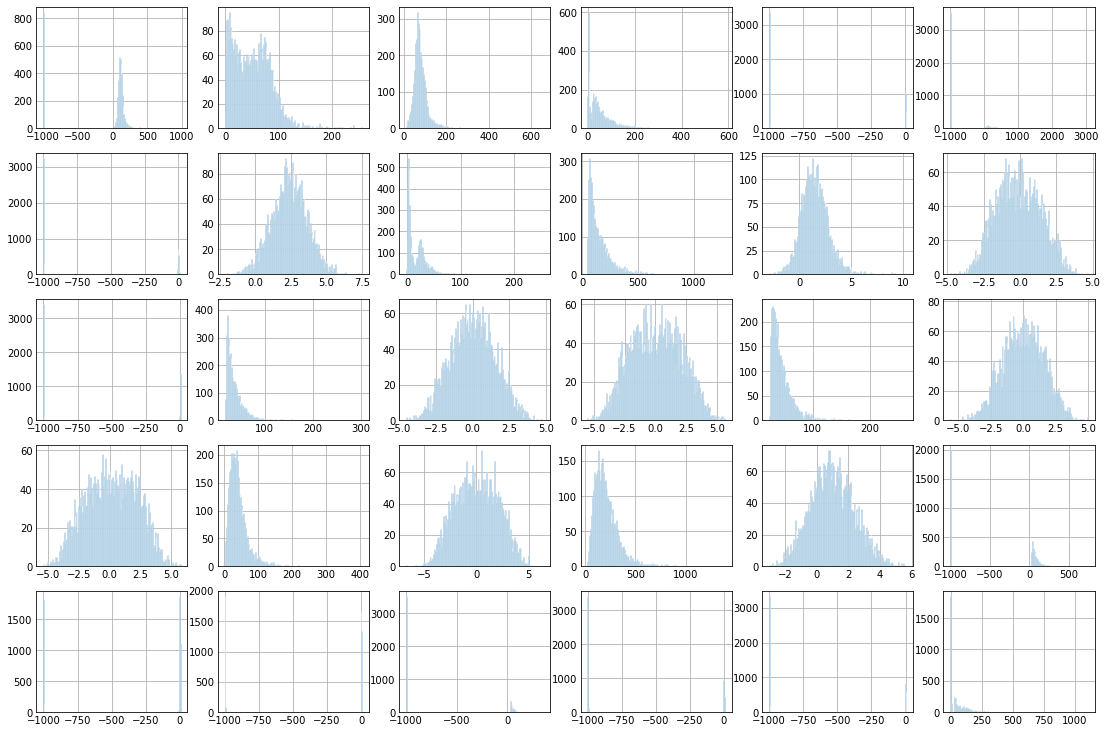

In [9]:
plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)
i=0
j=0
for feature in products.T:
    x = np.random.normal(feature)
    ax[i,j].hist(x, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

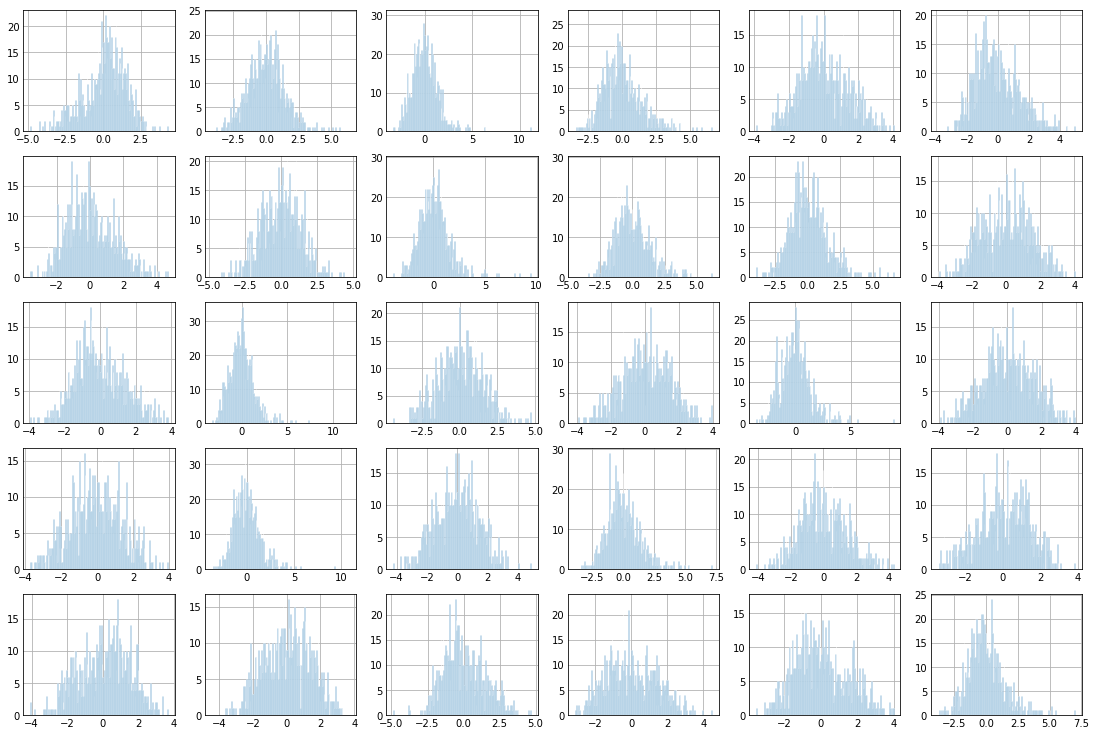

In [13]:
plt.style.use('_mpl-gallery')
# make data
np.random.seed(1)
# plot:
fig, ax = plt.subplots(5,6)

fig.set_size_inches(15, 10)
i=0
j=0
for feature in x.T:
    x1 = np.random.normal(feature)
    ax[i,j].hist(x1, bins=200, linewidth=0.5, edgecolor="white")
    if j==5:
        j = 0
        i += 1
    else:
        j += 1

plt.show()

In [ ]:
axis = 0 #rows (0), columns (1)
obj = [4,5,6,9,21,24,25,26,27,28,29]
tx_reduced = np.delete(tx,obj,axis)

In [4]:
def cross_validation_reg_logistic_regression_gamma(y, x, k_indices, k, lambda_, iterations, gamma):
    """return the loss of ridge regression for a fold corresponding to k_indices

    Args:
        y:          shape=(N,)
        x:          shape=(N,)
        k_indices:  2D array returned by build_k_indices()
        k:          scalar, the k-th fold (N.B.: not to confused with k_fold which is the fold nums)
        lambda_:    scalar, cf. ridge_regression()
        degree:     scalar, cf. build_poly()

    Returns:
        train and test root mean square errors rmse = sqrt(2 mse)

    >>> cross_validation(np.array([1.,2.,3.,4.]), np.array([6.,7.,8.,9.]), np.array([[3,2], [0,1]]), 1, 2, 3)
    (0.019866645527597114, 0.33555914361295175)
    """
    train_tx, train_y, test_tx, test_y = separate_data(x, y, k_indices, k)

    w, loss_tr = reg_logistic_regression(
        train_y, train_tx, lambda_, np.zeros((train_tx.shape[1], 1)), iterations, gamma
    )

    # rr_test = ridge_regression(test_y, poly_test, lambda_)

    loss_te = compute_loss_mse(test_y, test_tx, w) + lambda_ * np.dot(w.T, w)

    loss_tr = np.sqrt(2 * loss_tr) + lambda_ * np.dot(w.T, w)

    loss_te = np.sqrt(2 * loss_te) + lambda_ * np.dot(w.T, w)

    return loss_tr, loss_te

In [6]:
def find_best_gamma_reg_logistic_regression_gamma(x, y, k_fold, gammas):
    """cross validation over regularisation parameter lambda.

    Args:
        k_fold: integer, the number of folds
        lambdas: shape = (p, ) where p is the number of values of lambda to test
    Returns:
        best_lambda : scalar, value of the best lambda
        best_rmse : scalar, the associated root mean squared error for the best lambda
    """
    l=0.1
    iterations = 100
    seed = 12
    # split data in k fold
    k_indices = build_k_indices(y, k_fold, seed)
    # define lists to store the loss of training data and test data
    rmse_tr = []
    rmse_te = []
    # set the best rmse to a maximal value as a start
    best_rmse = 101
    best_lambda = 0
    for g in gammas:
        rmse_tr_temp = 0.0
        rmse_te_temp = 0.0
        for k in range(k_fold):
            loss_tr, loss_te = cross_validation_reg_logistic_regression_gamma(
                y, x, k_indices, k, l,iterations,g 
            )

            rmse_tr_temp += loss_tr
            rmse_te_temp += loss_te
        # do the average
        rmse_tr_temp = rmse_tr_temp / k_fold
        rmse_te_temp = rmse_te_temp / k_fold

        if rmse_te_temp < best_rmse:
            best_rmse = rmse_te_temp
            best_gamma = g
        rmse_tr.append(rmse_tr_temp[0])
        rmse_te.append(rmse_te_temp[0])

    cross_validation_visualization(gammas, rmse_tr, rmse_te)
    print(
        " the choice of gamma which leads to the best test rmse is %.5f with a test rmse of %.3f"
        % (best_gamma, best_rmse)
    )
    return best_lambda, best_rmse

 the choice of gamma which leads to the best test rmse is 0.00127 with a test rmse of 0.915


(0, array([[0.91488157]]))

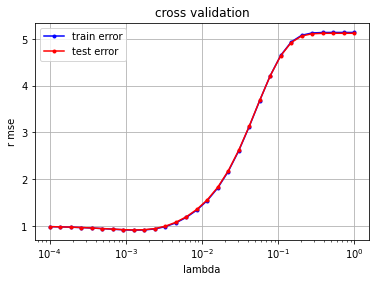

In [9]:
find_best_gamma_reg_logistic_regression_gamma(x, y, 3, np.logspace(-4, 0, 30))